# Pick a target and energy that KDUQ should be fit to, and see if our prior looks somewhat similar

In [1]:
import pickle

import numpy as np

In [2]:
neutron = (1, 0)
proton = (1, 1)

In [3]:
from jitr.reactions import ElasticReaction

In [4]:
from jitr.optical_potentials import kduq

In [5]:
import rxmc
import elm

Using database version X4-2024-12-31 located in: /home/beyerk/db/exfor/unpack_exfor-2024/X4-2024-12-31


In [6]:
with open("./prior_distribution.pickle", "rb") as f:
    prior = pickle.load(f)
prior_samples = prior.rvs(1000)

In [7]:
target = (208, 82)
projectile = neutron
energy_lab = 20
rxn = ElasticReaction(target=target, projectile=projectile)

In [8]:
kduq_samples = kduq.get_samples_federal(projectile)

In [9]:
kinematics = rxn.kinematics(energy_lab)
kinematics

ChannelKinematics(Elab=20, Ecm=19.903449469680808, mu=np.float64(954.6903694711453), k=np.float64(0.982788204101379), eta=np.float64(0.0))

In [10]:
np.mean(prior_samples, axis=0)

array([ 5.86071378e+01,  1.65056562e+01,  2.72277190e+01,  3.05066643e+01,
        1.90438628e+01,  3.15851111e+01, -3.77981533e-01,  4.55959511e-04,
        5.23367997e+01,  2.41660293e+01,  1.17038719e+00,  1.36028575e+00,
        7.19144385e-01,  5.04104800e-01])

In [11]:
rxmc.params.to_ordered_dict(
    np.mean(prior_samples, axis=0), [p.name for p in elm.params]
)

OrderedDict([('V0', np.float64(58.607137801217675)),
             ('W0', np.float64(16.50565620665539)),
             ('Wd0', np.float64(27.227719021720592)),
             ('V1', np.float64(30.506664309750864)),
             ('W1', np.float64(19.043862766603006)),
             ('Wd1', np.float64(31.585111082202108)),
             ('alpha', np.float64(-0.37798153337321044)),
             ('beta', np.float64(0.00045595951061689553)),
             ('gamma_w', np.float64(52.33679968272646)),
             ('gamma_d', np.float64(24.16602929368712)),
             ('r0A', np.float64(1.1703871921922537)),
             ('r1A', np.float64(1.3602857532687354)),
             ('a0', np.float64(0.7191443847854432)),
             ('a1', np.float64(0.5041047999090419))])

In [12]:
elm_prior_params = [
    elm.elm.calculate_parameters(projectile, target, kinematics.Ecm, rxn.Ef, *p)
    for p in prior_samples
]

In [13]:
isoscalar, isovector, so0, so1, coul, asym = (
    np.array(l) for l in zip(*elm_prior_params)
)

In [14]:
np.mean(isovector[:, :3], axis=0)

array([26.68456281,  2.41191991,  5.60132053])

In [15]:
np.mean(asym)

np.float64(0.21153846153846154)

In [17]:
kduq_params = [
    kduq.calculate_params(projectile, target, kinematics.Elab, *p) for p in kduq_samples
]

In [18]:
kduq_coul, kduq_central, kduq_so = (np.array(l) for l in zip(*kduq_params))

In [19]:
np.mean(kduq_central, axis=0)

array([42.84972517,  7.1957479 ,  0.71487971,  1.57565274,  7.1957479 ,
        0.71487971,  6.20241389,  7.39212527,  0.57457236])

In [20]:
np.mean(isoscalar, axis=0)

array([51.26462858,  2.09036506,  4.82854957,  6.93453491,  0.71914438,
        6.93453491,  0.71914438])

In [21]:
np.mean(isovector, axis=0)

array([26.68456281,  2.41191991,  5.60132053,  8.05968239,  0.5041048 ,
        8.05968239,  0.5041048 ])

In [22]:
np.mean(kduq_so, axis=0)

array([ 4.39717482,  6.50920067,  0.57430756, -0.04989921,  6.50920067,
        0.57430756])

In [23]:
np.mean(so0, axis=0)

array([5.58      , 0.        , 6.93453491, 0.71914438])

In [24]:
np.mean(so1, axis=0)

array([0.        , 0.        , 8.05968239, 0.5041048 ])

In [25]:
np.mean(coul, axis=0)

array([0.        , 6.93453491])

In [26]:
np.mean(asym, axis=0)

np.float64(0.21153846153846154)

In [27]:
np.std(isoscalar, axis=0)

array([0.34097314, 0.13817091, 0.08074784, 0.00994605, 0.00313246,
       0.00994605, 0.00313246])

In [28]:
np.std(isovector, axis=0)

array([0.41899238, 0.17268437, 0.29899819, 0.02930589, 0.00911012,
       0.02930589, 0.00911012])

In [29]:
np.std(so0, axis=0)

array([5.59552404e-14, 0.00000000e+00, 9.94605109e-03, 3.13246423e-03])

In [30]:
np.std(so1, axis=0)

array([0.        , 0.        , 0.02930589, 0.00911012])

In [31]:
np.std(coul, axis=0)

array([0.        , 0.00994605])

In [32]:
np.std(asym, axis=0)

np.float64(0.0)

In [33]:
r = np.linspace(0.1, 10, 100)
vso_kduq = kduq.spin_orbit(r, *np.mean(kduq_so, axis=0))
vso_elm = elm.model_form.spin_orbit(
    r, np.mean(asym), np.mean(so0, axis=0), np.mean(so1, axis=0)
)

vcentral_kduq = kduq.central(r, *np.mean(kduq_central, axis=0))
vcentral_elm = elm.model_form.central(
    r, np.mean(asym), np.mean(isoscalar, axis=0), np.mean(isovector, axis=0)
)

In [34]:
from matplotlib import pyplot as plt

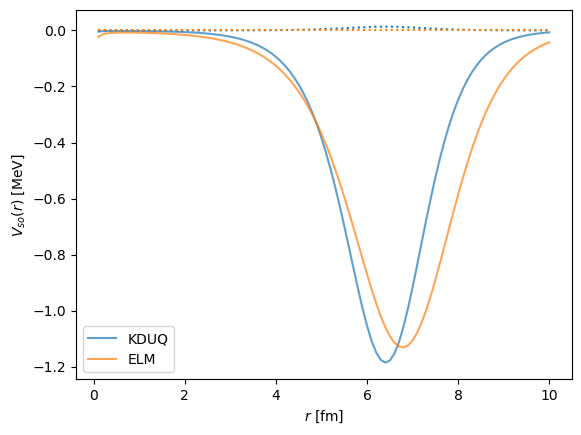

In [35]:
(p1,) = plt.plot(r, vso_kduq.real, alpha=0.7, label="KDUQ")
(p2,) = plt.plot(r, vso_elm.real, alpha=0.7, label="ELM")
plt.plot(r, vso_kduq.imag, ":", color=p1.get_color())
plt.plot(r, vso_elm.imag, ":", color=p2.get_color())
plt.ylabel(r"$V_{so}(r)$ [MeV]")
plt.xlabel(r"$r$ [fm]")

plt.legend()

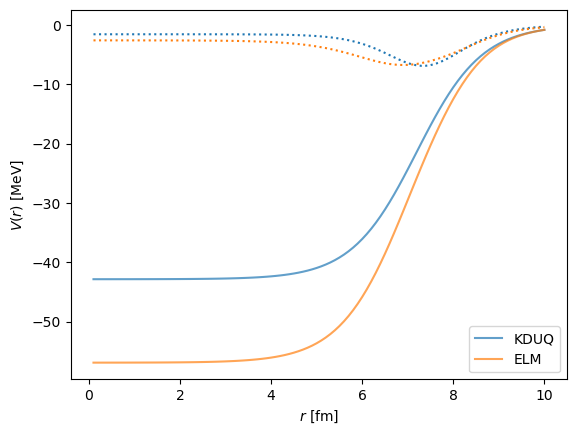

In [36]:
(p1,) = plt.plot(r, vcentral_kduq.real, alpha=0.7, label="KDUQ")
(p2,) = plt.plot(r, vcentral_elm.real, alpha=0.7, label="ELM")
plt.plot(r, vcentral_kduq.imag, ":", color=p1.get_color())
plt.plot(r, vcentral_elm.imag, ":", color=p2.get_color())
plt.ylabel(r"$V(r)$ [MeV]")
plt.xlabel(r"$r$ [fm]")
plt.legend()